In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import math
import glob
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

2025-02-18 23:40:09.500264: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm
import re

In [3]:
datapath = "../../data/MobiAct_feature_aug.csv"
df = pd.read_csv(datapath)
df.head()

,AvgX,AvgY,AvgZ,MedianX,MedianY,MedianZ,StdX,StdY,StdZ,SkewX,...,AbsMaxZ,AbsSlope,MeanMag,StdMag,MinMag,MaxMag,DiffMinMaxMag,ZCR_Mag,AverageResultantAcceleration,label
0,7.079540,0.292400,3.763926,8.336310,-0.800637,4.799377,2.868003,4.616586,2.274586,-1.821233,...,12.732082,25.968431,99.065435,37.258635,29.541558,567.998312,538.456755,0,99.065435,BSC
1,7.173739,1.640782,4.361933,7.536947,1.973893,5.578871,2.253994,3.824003,2.581553,-1.826785,...,13.052741,28.237861,99.534564,41.252435,30.958310,514.237251,483.278940,0,99.534564,BSC
2,7.330632,2.381979,3.417897,8.192033,3.039308,4.317029,2.640936,4.069859,2.199644,-1.708481,...,10.945221,27.597204,99.455316,40.969060,20.501091,523.780867,503.279777,0,99.455316,BSC
3,-5.568553,-0.217635,6.616517,-6.148310,-0.676446,7.363430,2.473055,3.530614,1.962968,1.075171,...,18.426916,31.743260,97.257094,56.157126,2.593039,961.689593,959.096554,0,97.257094,BSC
4,-4.795033,0.358094,7.179030,-5.434174,0.013750,7.892242,2.168915,3.643256,2.230609,1.192495,...,19.105164,32.353318,97.600097,63.150734,2.032286,1033.791111,1031.758825,0,97.600097,BSC


In [4]:
df.info() 
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AvgX                          3294 non-null   float64
 1   AvgY                          3294 non-null   float64
 2   AvgZ                          3294 non-null   float64
 3   MedianX                       3294 non-null   float64
 4   MedianY                       3294 non-null   float64
 5   MedianZ                       3294 non-null   float64
 6   StdX                          3294 non-null   float64
 7   StdY                          3294 non-null   float64
 8   StdZ                          3294 non-null   float64
 9   SkewX                         3294 non-null   float64
 10  SkewY                         3294 non-null   float64
 11  SkewZ                         3294 non-null   float64
 12  KurtosisX                     3294 non-null   float64
 13  Kur

,count,mean,std,min,25%,50%,75%,max
AvgX,3294.0,0.410833,3.628758,-9.886928,-1.945098,0.449712,2.950076,9.705663
AvgY,3294.0,4.251255,4.901131,-9.794727,1.638448,4.703366,8.814596,10.297934
AvgZ,3294.0,1.745927,4.209410,-9.826976,-0.297116,1.475094,5.766374,9.405894
MedianX,3294.0,0.406599,3.984900,-9.770841,-1.960339,0.311817,3.012170,9.819040
MedianY,3294.0,3.965840,5.433286,-10.408320,0.498359,3.532161,9.441478,11.140900
MedianZ,3294.0,1.766999,4.856065,-9.949785,-0.492540,0.822284,6.815637,9.553715
StdX,3294.0,2.372219,1.132904,0.035555,1.599901,2.211373,2.938132,7.859170
StdY,3294.0,3.822120,1.778256,0.023811,2.695819,3.277098,4.827666,9.902119
StdZ,3294.0,2.901933,1.017588,0.041281,2.207353,2.770354,3.573924,7.543139
SkewX,3294.0,-0.029612,1.237420,-4.765660,-0.797864,0.010570,0.791700,6.732506


In [5]:
print (df.isnull().sum()) 
print (any(df.isnull().sum()))

AvgX                            0
AvgY                            0
AvgZ                            0
MedianX                         0
MedianY                         0
MedianZ                         0
StdX                            0
StdY                            0
StdZ                            0
SkewX                           0
SkewY                           0
SkewZ                           0
KurtosisX                       0
KurtosisY                       0
KurtosisZ                       0
MinX                            0
MinY                            0
MinZ                            0
MaxX                            0
MaxY                            0
MaxZ                            0
Slope                           0
MeanTA                          0
StdTA                           0
SkewTA                          0
KurtosisTA                      0
AbsX                            0
AbsY                            0
AbsZ                            0
AbsMeanX      

In [6]:
from sklearn.preprocessing import StandardScaler

labels = df['label']
features = df.drop('label', axis=1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df = pd.DataFrame(features_scaled, columns=features.columns)
df['label'] = labels

In [7]:
print (f"{np.unique(df['label'])}")
print (df['label'].value_counts())

normal_labels = list(np.unique(df['label']))
normal_labels.remove('FKL')
normal_labels.remove('FOL')

['BSC' 'CHU' 'CSI' 'CSO' 'FKL' 'FOL' 'JOG' 'JUM' 'SBE' 'SBW' 'SCH' 'SDL'
 'SIT' 'SLH' 'SLW' 'SRH' 'STD' 'STN' 'STU' 'WAL']
label
SCH    365
STN    365
STU    364
CSO    360
CSI    358
SDL    192
FKL    192
FOL    192
BSC    191
JUM    183
JOG    183
CHU    114
WAL     61
STD     60
SBW     19
SBE     19
SIT     19
SLH     19
SLW     19
SRH     19
Name: count, dtype: int64


In [8]:
train_data = []
train_labels = []
test_normal_data = []
test_normal_labels = []

for activity in normal_labels:
    activity_data = df[df['label'] == activity]
    split_idx = int(len(activity_data) * 0.7)
    
    activity_features = activity_data.drop('label', axis=1)  
    
    train_data.append(activity_features.iloc[:split_idx])
    train_labels.append(np.zeros(len(activity_features.iloc[:split_idx]))) 
    
    test_normal_data.append(activity_features.iloc[split_idx:])
    test_normal_labels.append(np.zeros(len(activity_features.iloc[split_idx:]))) 

fall_data = df[df['label'].isin(['FKL', 'FOL'])]
test_fall_data = fall_data.drop('label', axis=1)
test_fall_labels = np.ones(len(fall_data)) 

train_data = pd.concat(train_data)
train_labels = np.concatenate(train_labels)
test_adl_data = pd.concat(test_normal_data)
test_adl_labels = np.concatenate(test_normal_labels)

print("train_data shape:", train_data.shape)
print("train_labels shape:", train_labels.shape)
print("test_adl_data shape:", test_adl_data.shape)
print("test_adl_labels shape:", test_adl_labels.shape)
print("test_fall_data shape:", test_fall_data.shape)
print("test_fall_labels shape:", test_fall_labels.shape)

print (set(train_labels))
print (set(test_adl_labels))
print (set(test_fall_labels))

train_data shape: (2029, 58)
train_labels shape: (2029,)
test_adl_data shape: (881, 58)
test_adl_labels shape: (881,)
test_fall_data shape: (384, 58)
test_fall_labels shape: (384,)
{0.0}
{0.0}
{1.0}


In [9]:
def split_sequences(data, labels, n_steps, stride):
    X, y = list(), list()
    
    sequences = np.column_stack((data, labels))
    
    for i in range(0, len(sequences) - n_steps + 1, stride):
        end_ix = i + n_steps
        
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [10]:
train_data, train_labels = split_sequences(train_data, train_labels, n_steps=50, stride=5)
test_adl_data, test_adl_labels = split_sequences(test_adl_data, test_adl_labels, n_steps=50, stride=5)
test_fall_data, test_fall_labels = split_sequences(test_fall_data, test_fall_labels, n_steps=50, stride=5)

print (train_data.shape, train_labels.shape)
print (test_adl_data.shape, test_adl_labels.shape)
print (test_fall_data.shape, test_fall_labels.shape)

(396, 50, 58) (396,)
(167, 50, 58) (167,)
(67, 50, 58) (67,)


----

In [11]:
EPOCHS = 300
INITIAL_LEARNING_RATE = 1e-3  
DECAY_STEPS = 1000  
DECAY_RATE = 0.98  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 32

In [12]:
class MobiActDataset(Dataset):
    def __init__(self, data):
        # Transpose data from [batch, window_length, features] to [batch, features, window_length]
        data = data.transpose(0, 2, 1)
        self.data = torch.FloatTensor(data)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]  # Returns shape [features, window_length]

In [13]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding='same'),
            nn.ReLU()
        )
        
        # Multiple Linear layers with increasing complexity
        self.mlp = nn.Sequential(
            nn.Linear(out_channels, out_channels * 2),
            nn.ReLU(),
            nn.Linear(out_channels * 2, out_channels * 4),
            nn.ReLU(),
            nn.Linear(out_channels * 4, out_channels * 2),
            nn.ReLU(),
            nn.Linear(out_channels * 2, out_channels)
        )
        
        # Layer Normalization for better training stability
        self.layer_norm = nn.LayerNorm(out_channels)
        
    def forward(self, x):
        # Convolutional path
        x = self.conv(x)
        
        # Reshape for Linear layers
        batch_size, channels, seq_len = x.shape
        x = x.transpose(1, 2)  # (batch, seq_len, channels)
        
        # Apply MLP to each timestep
        x = self.mlp(x)
        
        # Layer normalization
        x = self.layer_norm(x)
        
        # Reshape back to Conv format
        x = x.transpose(1, 2)  # (batch, channels, seq_len)
        
        return x

In [14]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

In [15]:
class CNNFeatureExtractor(nn.Module):
    def __init__(self, in_channels=58):
        super().__init__()
        # Encoder path
        self.inc = nn.Sequential(
            nn.Conv1d(in_channels, 64, kernel_size=3, padding='same'),
            nn.BatchNorm1d(64),
            nn.GELU()
        )  # [B, 64, 100]
        
        self.down = nn.Sequential(
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(64, 128, kernel_size=3, padding='same'),
            nn.BatchNorm1d(128),
            nn.GELU()
        )  # [B, 128, 50]
        
        # Decoder path
        self.up = nn.Sequential(
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv1d(128, 64, kernel_size=3, padding='same'),
            nn.BatchNorm1d(64),
            nn.GELU()
        )  # [B, 64, 100]

    def forward(self, x):
        # Encoder
        x1 = self.inc(x)      # [B, 64, 100]
        x2 = self.down(x1)    # [B, 128, 50]
        # Decoder
        x3 = self.up(x2)      # [B, 64, 100]
        
        return x2, (x1, x3)   # bottleneck: [B, 128, 50], skip: ([B, 64, 100], [B, 64, 100])


In [16]:
# class TransformerEncoder(nn.Module):
#     def __init__(self, embed_dim=128, num_heads=8, num_layers=4):
#         super().__init__()
#         self.layers = nn.ModuleList([
#             nn.TransformerEncoderLayer(
#                 d_model=embed_dim,
#                 nhead=num_heads,
#                 dim_feedforward=embed_dim*4,
#                 dropout=0.1,
#                 batch_first=True
#             ) for _ in range(num_layers)
#         ])
        
#         self.pos_embedding = nn.Parameter(torch.zeros(1, 100//4, embed_dim))

#     def forward(self, x):
#         B, C, L = x.shape
#         x = x.transpose(1, 2)
#         x = x + self.pos_embedding
        
#         for layer in self.layers:
#             x = layer(x)
            
#         return x.transpose(1, 2)

class PCAEncoder(nn.Module):
    def __init__(self, n_components=64):
        super().__init__()
        self.n_components = n_components
        self.pca = None
        self.trained = False
        
    def fit(self, x):
        # x shape: [batch_size, channels, seq_length]
        B, C, L = x.shape
        # Reshape for PCA: [batch_size * seq_length, channels]
        x_reshaped = x.transpose(1, 2).reshape(-1, C)
        
        # Perform PCA
        from sklearn.decomposition import PCA
        self.pca = PCA(n_components=self.n_components)
        self.pca.fit(x_reshaped.cpu().detach().numpy())
        self.trained = True
        
    def forward(self, x):
        # x shape: [batch_size, channels, seq_length]
        if not self.trained:
            self.fit(x)
            
        B, C, L = x.shape
        # Reshape for PCA transform
        x_reshaped = x.transpose(1, 2).reshape(-1, C)
        
        # Transform data
        x_transformed = self.pca.transform(x_reshaped.cpu().detach().numpy())
        x_transformed = torch.FloatTensor(x_transformed).to(x.device)
        
        # Reshape back: [batch_size, seq_length, n_components]
        x_final = x_transformed.reshape(B, L, self.n_components)
        
        # Return shape: [batch_size, n_components, seq_length]
        return x_final.transpose(1, 2)

In [17]:
class PCATransUNet1D(nn.Module):
    def __init__(self, in_channels=58):
        super().__init__()
        self.cnn_encoder = CNNFeatureExtractor(in_channels)
        self.pca_encoder = PCAEncoder(n_components=128)  # Match bottleneck dimension
        
        self.time_embed = nn.Sequential(
            SinusoidalPositionEmbeddings(128),
            nn.Linear(128, 128),
            nn.GELU(),
            nn.Linear(128, 128)
        )
        
        # Decoder
        self.up2 = nn.Sequential(
            nn.ConvTranspose1d(128, 64, kernel_size=2, stride=2),  # [B, 64, 100]
            DoubleConv(128, 64)  # 128 from concatenation (64+64)
        )
        
        self.up1 = nn.Sequential(
            nn.Conv1d(64, 32, kernel_size=3, padding='same'),
            DoubleConv(64, 32)   # 64 from concatenation (32+32)
        )
        
        self.final_conv = nn.Conv1d(32, in_channels, kernel_size=1)
        
    def forward(self, x, t):
        # Time embedding
        t_emb = self.time_embed(t)
        
        # CNN features
        features, skip_connections = self.cnn_encoder(x)  # features: [B, 128, 50]
        x1, x2 = skip_connections  # x1, x2: [B, 64, 100]
        
        # Add time information
        features = features + t_emb.unsqueeze(-1)
        
        # PCA encoding
        features = self.pca_encoder(features)  # [B, 128, 50]
        
        # Decoder with skip connections
        x = self.up2[0](features)  # [B, 64, 100]
        x = torch.cat([x, x2], dim=1)  # [B, 128, 100]
        x = self.up2[1](x)  # [B, 64, 100]
        
        x = self.up1[0](x)  # [B, 32, 100]
        x = torch.cat([x, torch.zeros_like(x)], dim=1)  # [B, 64, 100]
        x = self.up1[1](x)  # [B, 32, 100]
        
        return self.final_conv(x)  # [B, 9, 100]

In [18]:
class DDPM:
    def __init__(self, num_timesteps=1000, beta_start=1e-4, beta_end=0.02):
        """
        num_timesteps: total diffusion steps T
        beta_start, beta_end: β₁ and βₜ for linear schedule
        """
        self.num_timesteps = num_timesteps
        
        # Linear variance schedule
        self.betas = torch.linspace(beta_start, beta_end, num_timesteps)
        self.alphas = 1. - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        
    def q_sample(self, x_0, t):
        """
        Forward diffusion process: q(x_t | x_0)
        Samples from q(x_t | x_0) = N(x_t; √(αₜ)x₀, (1-αₜ)I)
        """
        sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod[t])[:, None, None]
        sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod[t])[:, None, None]
        epsilon = torch.randn_like(x_0)
        return sqrt_alphas_cumprod * x_0 + sqrt_one_minus_alphas_cumprod * epsilon, epsilon
    
    def sample_t(self, batch_size):
        """
        Uniformly sample timesteps t
        """
        return torch.randint(0, self.num_timesteps, (batch_size,))
        
    def p_sample(self, model, batch_size, device, shape):
        """
        Reverse diffusion process: p_θ(x_{t-1} | x_t)
        Generate samples using the reverse process
        """
        model.eval()
        with torch.no_grad():
            x_t = torch.randn(batch_size, *shape).to(device)
            
            for t in reversed(range(1, self.num_timesteps)):
                time_tensor = torch.ones(batch_size, dtype=torch.long).to(device) * t
                
                # Predict noise
                predicted_noise = model(x_t, time_tensor)
                
                alpha = self.alphas[t][:, None, None]
                alpha_cumprod = self.alphas_cumprod[t][:, None, None]
                beta = self.betas[t][:, None, None]
                
                # Add noise for stochasticity
                noise = torch.randn_like(x_t)
                
                # Compute mean for p_θ(x_{t-1} | x_t)
                x_t = 1 / torch.sqrt(alpha) * (
                    x_t - (1 - alpha) / torch.sqrt(1 - alpha_cumprod) * predicted_noise
                ) + torch.sqrt(beta) * noise
                
        model.train()
        return x_t

In [19]:
def train_ddpm(model, train_loader, ddpm, optimizer, num_epochs, device, scheduler):
    model.train()
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        n_batches = len(train_loader)
        
        for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            # batch is already [batch, features, window_length]
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]
            
            optimizer.zero_grad()
            t = ddpm.sample_t(batch_size).to(device)
            x_t, epsilon = ddpm.q_sample(x_0, t)
            epsilon_theta = model(x_t, t)
            loss = F.mse_loss(epsilon_theta, epsilon)
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            scheduler.step()
        
        avg_loss = epoch_loss / n_batches
        print(f'Epoch {epoch+1}/{num_epochs} - Avg Loss: {avg_loss:.4f}')

In [21]:
model = PCATransUNet1D().to(device)
ddpm = DDPM(num_timesteps=1000)  
optimizer = optim.AdamW(  
    model.parameters(),
    lr=1e-4,
    weight_decay=0.01 
)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS) 

train_dataset = MobiActDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

train_ddpm(
    model=model,
    train_loader=train_loader,
    ddpm=ddpm,
    optimizer=optimizer,
    num_epochs=EPOCHS,
    device=device,
    scheduler=scheduler
)

Epoch 1/300: 100%|████████████████████████████████| 13/13 [00:01<00:00,  8.97it/s]


Epoch 1/300 - Avg Loss: 1.3901


Epoch 2/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 31.40it/s]


Epoch 2/300 - Avg Loss: 1.2971


Epoch 3/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 32.61it/s]


Epoch 3/300 - Avg Loss: 1.2073


Epoch 4/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 31.82it/s]


Epoch 4/300 - Avg Loss: 1.1317


Epoch 5/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 33.36it/s]


Epoch 5/300 - Avg Loss: 1.0901


Epoch 6/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 30.79it/s]


Epoch 6/300 - Avg Loss: 1.0686


Epoch 7/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 31.63it/s]


Epoch 7/300 - Avg Loss: 1.0500


Epoch 8/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 31.03it/s]


Epoch 8/300 - Avg Loss: 1.0396


Epoch 9/300: 100%|████████████████████████████████| 13/13 [00:00<00:00, 31.01it/s]


Epoch 9/300 - Avg Loss: 1.0317


Epoch 10/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 29.76it/s]


Epoch 10/300 - Avg Loss: 1.0242


Epoch 11/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 30.59it/s]


Epoch 11/300 - Avg Loss: 1.0191


Epoch 12/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 31.97it/s]


Epoch 12/300 - Avg Loss: 1.0154


Epoch 13/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 30.34it/s]


Epoch 13/300 - Avg Loss: 1.0153


Epoch 14/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 30.98it/s]


Epoch 14/300 - Avg Loss: 1.0113


Epoch 15/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 31.50it/s]


Epoch 15/300 - Avg Loss: 1.0103


Epoch 16/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 30.58it/s]


Epoch 16/300 - Avg Loss: 1.0100


Epoch 17/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 30.80it/s]


Epoch 17/300 - Avg Loss: 1.0086


Epoch 18/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 29.15it/s]


Epoch 18/300 - Avg Loss: 1.0067


Epoch 19/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 27.01it/s]


Epoch 19/300 - Avg Loss: 1.0095


Epoch 20/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 27.08it/s]


Epoch 20/300 - Avg Loss: 1.0066


Epoch 21/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 26.79it/s]


Epoch 21/300 - Avg Loss: 1.0094


Epoch 22/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 24.90it/s]


Epoch 22/300 - Avg Loss: 1.0076


Epoch 23/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 27.49it/s]


Epoch 23/300 - Avg Loss: 1.0073


Epoch 24/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 24.58it/s]


Epoch 24/300 - Avg Loss: 1.0092


Epoch 25/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 24.53it/s]


Epoch 25/300 - Avg Loss: 1.0062


Epoch 26/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 25.99it/s]


Epoch 26/300 - Avg Loss: 1.0078


Epoch 27/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.76it/s]


Epoch 27/300 - Avg Loss: 1.0084


Epoch 28/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.58it/s]


Epoch 28/300 - Avg Loss: 1.0062


Epoch 29/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 15.84it/s]


Epoch 29/300 - Avg Loss: 1.0054


Epoch 30/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.70it/s]


Epoch 30/300 - Avg Loss: 1.0046


Epoch 31/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 19.23it/s]


Epoch 31/300 - Avg Loss: 1.0044


Epoch 32/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.66it/s]


Epoch 32/300 - Avg Loss: 1.0047


Epoch 33/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 14.15it/s]


Epoch 33/300 - Avg Loss: 1.0042


Epoch 34/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 18.29it/s]


Epoch 34/300 - Avg Loss: 1.0000


Epoch 35/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 17.38it/s]


Epoch 35/300 - Avg Loss: 1.0021


Epoch 36/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 16.63it/s]


Epoch 36/300 - Avg Loss: 1.0015


Epoch 37/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 17.71it/s]


Epoch 37/300 - Avg Loss: 0.9992


Epoch 38/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.75it/s]


Epoch 38/300 - Avg Loss: 0.9994


Epoch 39/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.42it/s]


Epoch 39/300 - Avg Loss: 0.9970


Epoch 40/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.57it/s]


Epoch 40/300 - Avg Loss: 0.9970


Epoch 41/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.33it/s]


Epoch 41/300 - Avg Loss: 0.9940


Epoch 42/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 19.91it/s]


Epoch 42/300 - Avg Loss: 0.9959


Epoch 43/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 19.47it/s]


Epoch 43/300 - Avg Loss: 0.9939


Epoch 44/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.75it/s]


Epoch 44/300 - Avg Loss: 0.9936


Epoch 45/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.52it/s]


Epoch 45/300 - Avg Loss: 0.9934


Epoch 46/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 25.53it/s]


Epoch 46/300 - Avg Loss: 0.9915


Epoch 47/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.07it/s]


Epoch 47/300 - Avg Loss: 0.9912


Epoch 48/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.13it/s]


Epoch 48/300 - Avg Loss: 0.9899


Epoch 49/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.04it/s]


Epoch 49/300 - Avg Loss: 0.9884


Epoch 50/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.16it/s]


Epoch 50/300 - Avg Loss: 0.9887


Epoch 51/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.80it/s]


Epoch 51/300 - Avg Loss: 0.9893


Epoch 52/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 19.87it/s]


Epoch 52/300 - Avg Loss: 0.9869


Epoch 53/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.85it/s]


Epoch 53/300 - Avg Loss: 0.9858


Epoch 54/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.95it/s]


Epoch 54/300 - Avg Loss: 0.9878


Epoch 55/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.22it/s]


Epoch 55/300 - Avg Loss: 0.9865


Epoch 56/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.89it/s]


Epoch 56/300 - Avg Loss: 0.9844


Epoch 57/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.45it/s]


Epoch 57/300 - Avg Loss: 0.9841


Epoch 58/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 17.35it/s]


Epoch 58/300 - Avg Loss: 0.9866


Epoch 59/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.18it/s]


Epoch 59/300 - Avg Loss: 0.9869


Epoch 60/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.80it/s]


Epoch 60/300 - Avg Loss: 0.9847


Epoch 61/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.18it/s]


Epoch 61/300 - Avg Loss: 0.9823


Epoch 62/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.55it/s]


Epoch 62/300 - Avg Loss: 0.9853


Epoch 63/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 19.80it/s]


Epoch 63/300 - Avg Loss: 0.9869


Epoch 64/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.85it/s]


Epoch 64/300 - Avg Loss: 0.9861


Epoch 65/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.66it/s]


Epoch 65/300 - Avg Loss: 0.9865


Epoch 66/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.81it/s]


Epoch 66/300 - Avg Loss: 0.9867


Epoch 67/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.27it/s]


Epoch 67/300 - Avg Loss: 0.9835


Epoch 68/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.88it/s]


Epoch 68/300 - Avg Loss: 0.9845


Epoch 69/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.55it/s]


Epoch 69/300 - Avg Loss: 0.9854


Epoch 70/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.12it/s]


Epoch 70/300 - Avg Loss: 0.9830


Epoch 71/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 24.23it/s]


Epoch 71/300 - Avg Loss: 0.9877


Epoch 72/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.31it/s]


Epoch 72/300 - Avg Loss: 0.9821


Epoch 73/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 17.28it/s]


Epoch 73/300 - Avg Loss: 0.9856


Epoch 74/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 14.67it/s]


Epoch 74/300 - Avg Loss: 0.9851


Epoch 75/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 16.99it/s]


Epoch 75/300 - Avg Loss: 0.9859


Epoch 76/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 18.11it/s]


Epoch 76/300 - Avg Loss: 0.9849


Epoch 77/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 18.89it/s]


Epoch 77/300 - Avg Loss: 0.9870


Epoch 78/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 19.33it/s]


Epoch 78/300 - Avg Loss: 0.9856


Epoch 79/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 18.75it/s]


Epoch 79/300 - Avg Loss: 0.9834


Epoch 80/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.51it/s]


Epoch 80/300 - Avg Loss: 0.9833


Epoch 81/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.04it/s]


Epoch 81/300 - Avg Loss: 0.9835


Epoch 82/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.04it/s]


Epoch 82/300 - Avg Loss: 0.9845


Epoch 83/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.43it/s]


Epoch 83/300 - Avg Loss: 0.9836


Epoch 84/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.20it/s]


Epoch 84/300 - Avg Loss: 0.9832


Epoch 85/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 18.36it/s]


Epoch 85/300 - Avg Loss: 0.9819


Epoch 86/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 20.22it/s]


Epoch 86/300 - Avg Loss: 0.9824


Epoch 87/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.38it/s]


Epoch 87/300 - Avg Loss: 0.9822


Epoch 88/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.32it/s]


Epoch 88/300 - Avg Loss: 0.9833


Epoch 89/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.13it/s]


Epoch 89/300 - Avg Loss: 0.9811


Epoch 90/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.85it/s]


Epoch 90/300 - Avg Loss: 0.9806


Epoch 91/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 21.65it/s]


Epoch 91/300 - Avg Loss: 0.9800


Epoch 92/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.85it/s]


Epoch 92/300 - Avg Loss: 0.9798


Epoch 93/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 24.13it/s]


Epoch 93/300 - Avg Loss: 0.9801


Epoch 94/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.94it/s]


Epoch 94/300 - Avg Loss: 0.9753


Epoch 95/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.14it/s]


Epoch 95/300 - Avg Loss: 0.9768


Epoch 96/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.45it/s]


Epoch 96/300 - Avg Loss: 0.9764


Epoch 97/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 22.57it/s]


Epoch 97/300 - Avg Loss: 0.9740


Epoch 98/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.43it/s]


Epoch 98/300 - Avg Loss: 0.9724


Epoch 99/300: 100%|███████████████████████████████| 13/13 [00:00<00:00, 23.08it/s]


Epoch 99/300 - Avg Loss: 0.9743


Epoch 100/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.14it/s]


Epoch 100/300 - Avg Loss: 0.9719


Epoch 101/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.38it/s]


Epoch 101/300 - Avg Loss: 0.9720


Epoch 102/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.79it/s]


Epoch 102/300 - Avg Loss: 0.9715


Epoch 103/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.33it/s]


Epoch 103/300 - Avg Loss: 0.9700


Epoch 104/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.26it/s]


Epoch 104/300 - Avg Loss: 0.9720


Epoch 105/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.33it/s]


Epoch 105/300 - Avg Loss: 0.9687


Epoch 106/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.43it/s]


Epoch 106/300 - Avg Loss: 0.9699


Epoch 107/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.29it/s]


Epoch 107/300 - Avg Loss: 0.9717


Epoch 108/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 15.43it/s]


Epoch 108/300 - Avg Loss: 0.9703


Epoch 109/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 15.96it/s]


Epoch 109/300 - Avg Loss: 0.9700


Epoch 110/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.09it/s]


Epoch 110/300 - Avg Loss: 0.9695


Epoch 111/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.12it/s]


Epoch 111/300 - Avg Loss: 0.9695


Epoch 112/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 15.70it/s]


Epoch 112/300 - Avg Loss: 0.9702


Epoch 113/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 15.73it/s]


Epoch 113/300 - Avg Loss: 0.9700


Epoch 114/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 15.19it/s]


Epoch 114/300 - Avg Loss: 0.9688


Epoch 115/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.96it/s]


Epoch 115/300 - Avg Loss: 0.9694


Epoch 116/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.33it/s]


Epoch 116/300 - Avg Loss: 0.9673


Epoch 117/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.83it/s]


Epoch 117/300 - Avg Loss: 0.9697


Epoch 118/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.93it/s]


Epoch 118/300 - Avg Loss: 0.9680


Epoch 119/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.08it/s]


Epoch 119/300 - Avg Loss: 0.9690


Epoch 120/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.10it/s]


Epoch 120/300 - Avg Loss: 0.9704


Epoch 121/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.71it/s]


Epoch 121/300 - Avg Loss: 0.9665


Epoch 122/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.91it/s]


Epoch 122/300 - Avg Loss: 0.9686


Epoch 123/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.17it/s]


Epoch 123/300 - Avg Loss: 0.9672


Epoch 124/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.76it/s]


Epoch 124/300 - Avg Loss: 0.9668


Epoch 125/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.20it/s]


Epoch 125/300 - Avg Loss: 0.9669


Epoch 126/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.80it/s]


Epoch 126/300 - Avg Loss: 0.9666


Epoch 127/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.39it/s]


Epoch 127/300 - Avg Loss: 0.9645


Epoch 128/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.08it/s]


Epoch 128/300 - Avg Loss: 0.9635


Epoch 129/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.47it/s]


Epoch 129/300 - Avg Loss: 0.9652


Epoch 130/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.17it/s]


Epoch 130/300 - Avg Loss: 0.9645


Epoch 131/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.70it/s]


Epoch 131/300 - Avg Loss: 0.9654


Epoch 132/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.54it/s]


Epoch 132/300 - Avg Loss: 0.9666


Epoch 133/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.22it/s]


Epoch 133/300 - Avg Loss: 0.9641


Epoch 134/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.87it/s]


Epoch 134/300 - Avg Loss: 0.9653


Epoch 135/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.28it/s]


Epoch 135/300 - Avg Loss: 0.9629


Epoch 136/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.18it/s]


Epoch 136/300 - Avg Loss: 0.9619


Epoch 137/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.81it/s]


Epoch 137/300 - Avg Loss: 0.9642


Epoch 138/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.89it/s]


Epoch 138/300 - Avg Loss: 0.9629


Epoch 139/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.33it/s]


Epoch 139/300 - Avg Loss: 0.9597


Epoch 140/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.79it/s]


Epoch 140/300 - Avg Loss: 0.9610


Epoch 141/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.09it/s]


Epoch 141/300 - Avg Loss: 0.9630


Epoch 142/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.41it/s]


Epoch 142/300 - Avg Loss: 0.9559


Epoch 143/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.81it/s]


Epoch 143/300 - Avg Loss: 0.9574


Epoch 144/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.41it/s]


Epoch 144/300 - Avg Loss: 0.9594


Epoch 145/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.58it/s]


Epoch 145/300 - Avg Loss: 0.9581


Epoch 146/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.33it/s]


Epoch 146/300 - Avg Loss: 0.9567


Epoch 147/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.81it/s]


Epoch 147/300 - Avg Loss: 0.9578


Epoch 148/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.76it/s]


Epoch 148/300 - Avg Loss: 0.9579


Epoch 149/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.69it/s]


Epoch 149/300 - Avg Loss: 0.9557


Epoch 150/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.84it/s]


Epoch 150/300 - Avg Loss: 0.9578


Epoch 151/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.96it/s]


Epoch 151/300 - Avg Loss: 0.9562


Epoch 152/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.31it/s]


Epoch 152/300 - Avg Loss: 0.9547


Epoch 153/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.81it/s]


Epoch 153/300 - Avg Loss: 0.9576


Epoch 154/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.10it/s]


Epoch 154/300 - Avg Loss: 0.9548


Epoch 155/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.18it/s]


Epoch 155/300 - Avg Loss: 0.9533


Epoch 156/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.08it/s]


Epoch 156/300 - Avg Loss: 0.9551


Epoch 157/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.04it/s]


Epoch 157/300 - Avg Loss: 0.9530


Epoch 158/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.85it/s]


Epoch 158/300 - Avg Loss: 0.9533


Epoch 159/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.28it/s]


Epoch 159/300 - Avg Loss: 0.9539


Epoch 160/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.41it/s]


Epoch 160/300 - Avg Loss: 0.9554


Epoch 161/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.09it/s]


Epoch 161/300 - Avg Loss: 0.9548


Epoch 162/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.59it/s]


Epoch 162/300 - Avg Loss: 0.9550


Epoch 163/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.76it/s]


Epoch 163/300 - Avg Loss: 0.9536


Epoch 164/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.55it/s]


Epoch 164/300 - Avg Loss: 0.9541


Epoch 165/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.40it/s]


Epoch 165/300 - Avg Loss: 0.9534


Epoch 166/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.90it/s]


Epoch 166/300 - Avg Loss: 0.9556


Epoch 167/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.48it/s]


Epoch 167/300 - Avg Loss: 0.9534


Epoch 168/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.03it/s]


Epoch 168/300 - Avg Loss: 0.9540


Epoch 169/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.66it/s]


Epoch 169/300 - Avg Loss: 0.9547


Epoch 170/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.04it/s]


Epoch 170/300 - Avg Loss: 0.9560


Epoch 171/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.81it/s]


Epoch 171/300 - Avg Loss: 0.9538


Epoch 172/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.68it/s]


Epoch 172/300 - Avg Loss: 0.9531


Epoch 173/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.10it/s]


Epoch 173/300 - Avg Loss: 0.9520


Epoch 174/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.05it/s]


Epoch 174/300 - Avg Loss: 0.9530


Epoch 175/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 16.86it/s]


Epoch 175/300 - Avg Loss: 0.9514


Epoch 176/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.62it/s]


Epoch 176/300 - Avg Loss: 0.9547


Epoch 177/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 26.36it/s]


Epoch 177/300 - Avg Loss: 0.9531


Epoch 178/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.08it/s]


Epoch 178/300 - Avg Loss: 0.9516


Epoch 179/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.42it/s]


Epoch 179/300 - Avg Loss: 0.9543


Epoch 180/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.29it/s]


Epoch 180/300 - Avg Loss: 0.9503


Epoch 181/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 16.31it/s]


Epoch 181/300 - Avg Loss: 0.9514


Epoch 182/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.59it/s]


Epoch 182/300 - Avg Loss: 0.9510


Epoch 183/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.49it/s]


Epoch 183/300 - Avg Loss: 0.9498


Epoch 184/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.63it/s]


Epoch 184/300 - Avg Loss: 0.9521


Epoch 185/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.62it/s]


Epoch 185/300 - Avg Loss: 0.9491


Epoch 186/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.78it/s]


Epoch 186/300 - Avg Loss: 0.9481


Epoch 187/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.67it/s]


Epoch 187/300 - Avg Loss: 0.9502


Epoch 188/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.48it/s]


Epoch 188/300 - Avg Loss: 0.9466


Epoch 189/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.38it/s]


Epoch 189/300 - Avg Loss: 0.9497


Epoch 190/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.65it/s]


Epoch 190/300 - Avg Loss: 0.9505


Epoch 191/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.79it/s]


Epoch 191/300 - Avg Loss: 0.9464


Epoch 192/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.22it/s]


Epoch 192/300 - Avg Loss: 0.9497


Epoch 193/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.07it/s]


Epoch 193/300 - Avg Loss: 0.9455


Epoch 194/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.54it/s]


Epoch 194/300 - Avg Loss: 0.9483


Epoch 195/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.34it/s]


Epoch 195/300 - Avg Loss: 0.9476


Epoch 196/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.23it/s]


Epoch 196/300 - Avg Loss: 0.9466


Epoch 197/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.13it/s]


Epoch 197/300 - Avg Loss: 0.9457


Epoch 198/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.52it/s]


Epoch 198/300 - Avg Loss: 0.9510


Epoch 199/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.13it/s]


Epoch 199/300 - Avg Loss: 0.9467


Epoch 200/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.63it/s]


Epoch 200/300 - Avg Loss: 0.9468


Epoch 201/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.40it/s]


Epoch 201/300 - Avg Loss: 0.9465


Epoch 202/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.14it/s]


Epoch 202/300 - Avg Loss: 0.9435


Epoch 203/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.55it/s]


Epoch 203/300 - Avg Loss: 0.9471


Epoch 204/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.50it/s]


Epoch 204/300 - Avg Loss: 0.9465


Epoch 205/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.61it/s]


Epoch 205/300 - Avg Loss: 0.9445


Epoch 206/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.91it/s]


Epoch 206/300 - Avg Loss: 0.9466


Epoch 207/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.28it/s]


Epoch 207/300 - Avg Loss: 0.9440


Epoch 208/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.66it/s]


Epoch 208/300 - Avg Loss: 0.9436


Epoch 209/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.23it/s]


Epoch 209/300 - Avg Loss: 0.9437


Epoch 210/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.65it/s]


Epoch 210/300 - Avg Loss: 0.9416


Epoch 211/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.80it/s]


Epoch 211/300 - Avg Loss: 0.9441


Epoch 212/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.37it/s]


Epoch 212/300 - Avg Loss: 0.9447


Epoch 213/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.39it/s]


Epoch 213/300 - Avg Loss: 0.9474


Epoch 214/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 16.94it/s]


Epoch 214/300 - Avg Loss: 0.9452


Epoch 215/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.15it/s]


Epoch 215/300 - Avg Loss: 0.9449


Epoch 216/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.70it/s]


Epoch 216/300 - Avg Loss: 0.9449


Epoch 217/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.92it/s]


Epoch 217/300 - Avg Loss: 0.9437


Epoch 218/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.76it/s]


Epoch 218/300 - Avg Loss: 0.9423


Epoch 219/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.58it/s]


Epoch 219/300 - Avg Loss: 0.9445


Epoch 220/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.66it/s]


Epoch 220/300 - Avg Loss: 0.9459


Epoch 221/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.29it/s]


Epoch 221/300 - Avg Loss: 0.9449


Epoch 222/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.00it/s]


Epoch 222/300 - Avg Loss: 0.9453


Epoch 223/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.69it/s]


Epoch 223/300 - Avg Loss: 0.9423


Epoch 224/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.46it/s]


Epoch 224/300 - Avg Loss: 0.9440


Epoch 225/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.02it/s]


Epoch 225/300 - Avg Loss: 0.9430


Epoch 226/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.83it/s]


Epoch 226/300 - Avg Loss: 0.9439


Epoch 227/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 16.74it/s]


Epoch 227/300 - Avg Loss: 0.9414


Epoch 228/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.48it/s]


Epoch 228/300 - Avg Loss: 0.9403


Epoch 229/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.79it/s]


Epoch 229/300 - Avg Loss: 0.9442


Epoch 230/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.47it/s]


Epoch 230/300 - Avg Loss: 0.9399


Epoch 231/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.61it/s]


Epoch 231/300 - Avg Loss: 0.9390


Epoch 232/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.75it/s]


Epoch 232/300 - Avg Loss: 0.9399


Epoch 233/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.08it/s]


Epoch 233/300 - Avg Loss: 0.9391


Epoch 234/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.59it/s]


Epoch 234/300 - Avg Loss: 0.9365


Epoch 235/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.26it/s]


Epoch 235/300 - Avg Loss: 0.9393


Epoch 236/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.35it/s]


Epoch 236/300 - Avg Loss: 0.9368


Epoch 237/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.31it/s]


Epoch 237/300 - Avg Loss: 0.9415


Epoch 238/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.87it/s]


Epoch 238/300 - Avg Loss: 0.9374


Epoch 239/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.17it/s]


Epoch 239/300 - Avg Loss: 0.9374


Epoch 240/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.70it/s]


Epoch 240/300 - Avg Loss: 0.9373


Epoch 241/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.72it/s]


Epoch 241/300 - Avg Loss: 0.9367


Epoch 242/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.56it/s]


Epoch 242/300 - Avg Loss: 0.9340


Epoch 243/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.91it/s]


Epoch 243/300 - Avg Loss: 0.9380


Epoch 244/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.47it/s]


Epoch 244/300 - Avg Loss: 0.9363


Epoch 245/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.30it/s]


Epoch 245/300 - Avg Loss: 0.9360


Epoch 246/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.53it/s]


Epoch 246/300 - Avg Loss: 0.9377


Epoch 247/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.21it/s]


Epoch 247/300 - Avg Loss: 0.9341


Epoch 248/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.70it/s]


Epoch 248/300 - Avg Loss: 0.9328


Epoch 249/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.98it/s]


Epoch 249/300 - Avg Loss: 0.9324


Epoch 250/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.47it/s]


Epoch 250/300 - Avg Loss: 0.9334


Epoch 251/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.06it/s]


Epoch 251/300 - Avg Loss: 0.9348


Epoch 252/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.79it/s]


Epoch 252/300 - Avg Loss: 0.9343


Epoch 253/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.30it/s]


Epoch 253/300 - Avg Loss: 0.9341


Epoch 254/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.74it/s]


Epoch 254/300 - Avg Loss: 0.9329


Epoch 255/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.49it/s]


Epoch 255/300 - Avg Loss: 0.9348


Epoch 256/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.16it/s]


Epoch 256/300 - Avg Loss: 0.9348


Epoch 257/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.37it/s]


Epoch 257/300 - Avg Loss: 0.9362


Epoch 258/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.63it/s]


Epoch 258/300 - Avg Loss: 0.9350


Epoch 259/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.25it/s]


Epoch 259/300 - Avg Loss: 0.9350


Epoch 260/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.69it/s]


Epoch 260/300 - Avg Loss: 0.9372


Epoch 261/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 16.01it/s]


Epoch 261/300 - Avg Loss: 0.9358


Epoch 262/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 13.73it/s]


Epoch 262/300 - Avg Loss: 0.9339


Epoch 263/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.04it/s]


Epoch 263/300 - Avg Loss: 0.9354


Epoch 264/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.92it/s]


Epoch 264/300 - Avg Loss: 0.9378


Epoch 265/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.75it/s]


Epoch 265/300 - Avg Loss: 0.9359


Epoch 266/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.10it/s]


Epoch 266/300 - Avg Loss: 0.9362


Epoch 267/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.89it/s]


Epoch 267/300 - Avg Loss: 0.9333


Epoch 268/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.70it/s]


Epoch 268/300 - Avg Loss: 0.9340


Epoch 269/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.14it/s]


Epoch 269/300 - Avg Loss: 0.9368


Epoch 270/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.38it/s]


Epoch 270/300 - Avg Loss: 0.9320


Epoch 271/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.66it/s]


Epoch 271/300 - Avg Loss: 0.9330


Epoch 272/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.07it/s]


Epoch 272/300 - Avg Loss: 0.9350


Epoch 273/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.06it/s]


Epoch 273/300 - Avg Loss: 0.9333


Epoch 274/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.42it/s]


Epoch 274/300 - Avg Loss: 0.9346


Epoch 275/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.35it/s]


Epoch 275/300 - Avg Loss: 0.9309


Epoch 276/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 21.39it/s]


Epoch 276/300 - Avg Loss: 0.9286


Epoch 277/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 19.21it/s]


Epoch 277/300 - Avg Loss: 0.9313


Epoch 278/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.69it/s]


Epoch 278/300 - Avg Loss: 0.9329


Epoch 279/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 17.43it/s]


Epoch 279/300 - Avg Loss: 0.9295


Epoch 280/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 18.17it/s]


Epoch 280/300 - Avg Loss: 0.9285


Epoch 281/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 20.52it/s]


Epoch 281/300 - Avg Loss: 0.9324


Epoch 282/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.42it/s]


Epoch 282/300 - Avg Loss: 0.9287


Epoch 283/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.68it/s]


Epoch 283/300 - Avg Loss: 0.9287


Epoch 284/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.61it/s]


Epoch 284/300 - Avg Loss: 0.9289


Epoch 285/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.13it/s]


Epoch 285/300 - Avg Loss: 0.9280


Epoch 286/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.52it/s]


Epoch 286/300 - Avg Loss: 0.9291


Epoch 287/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.43it/s]


Epoch 287/300 - Avg Loss: 0.9277


Epoch 288/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.92it/s]


Epoch 288/300 - Avg Loss: 0.9254


Epoch 289/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 25.40it/s]


Epoch 289/300 - Avg Loss: 0.9296


Epoch 290/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.43it/s]


Epoch 290/300 - Avg Loss: 0.9290


Epoch 291/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.21it/s]


Epoch 291/300 - Avg Loss: 0.9271


Epoch 292/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.87it/s]


Epoch 292/300 - Avg Loss: 0.9243


Epoch 293/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.68it/s]


Epoch 293/300 - Avg Loss: 0.9281


Epoch 294/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.70it/s]


Epoch 294/300 - Avg Loss: 0.9276


Epoch 295/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.44it/s]


Epoch 295/300 - Avg Loss: 0.9284


Epoch 296/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.80it/s]


Epoch 296/300 - Avg Loss: 0.9261


Epoch 297/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 22.95it/s]


Epoch 297/300 - Avg Loss: 0.9263


Epoch 298/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 23.86it/s]


Epoch 298/300 - Avg Loss: 0.9264


Epoch 299/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.28it/s]


Epoch 299/300 - Avg Loss: 0.9285


Epoch 300/300: 100%|██████████████████████████████| 13/13 [00:00<00:00, 24.20it/s]

Epoch 300/300 - Avg Loss: 0.9262


---

In [22]:
def detect_anomalies(model, ddpm, data_loader, device, threshold=None):
    model.eval()
    anomaly_scores = []

    with torch.no_grad():
        for batch in data_loader:
            x_0 = batch.to(device)
            batch_size = x_0.shape[0]

            t = ddpm.sample_t(batch_size).to(device)

            x_t, epsilon = ddpm.q_sample(x_0, t)

            epsilon_theta = model(x_t, t)

            # MSE Loss (Anomaly Score)
            loss = F.mse_loss(epsilon_theta, epsilon, reduction='none')
            loss = loss.mean(dim=(1, 2)) 
            anomaly_scores.extend(loss.cpu().numpy())  

    if threshold is None:
        threshold = np.percentile(anomaly_scores, 95)

    anomalies = [score > threshold for score in anomaly_scores]

    return anomalies, anomaly_scores, threshold


In [23]:
normal_dataset = MobiActDataset(test_adl_data)
normal_loader = DataLoader(normal_dataset, batch_size=BATCH_SIZE)

abnormal_dataset = MobiActDataset(test_fall_data)
abnormal_loader = DataLoader(abnormal_dataset, batch_size=BATCH_SIZE)

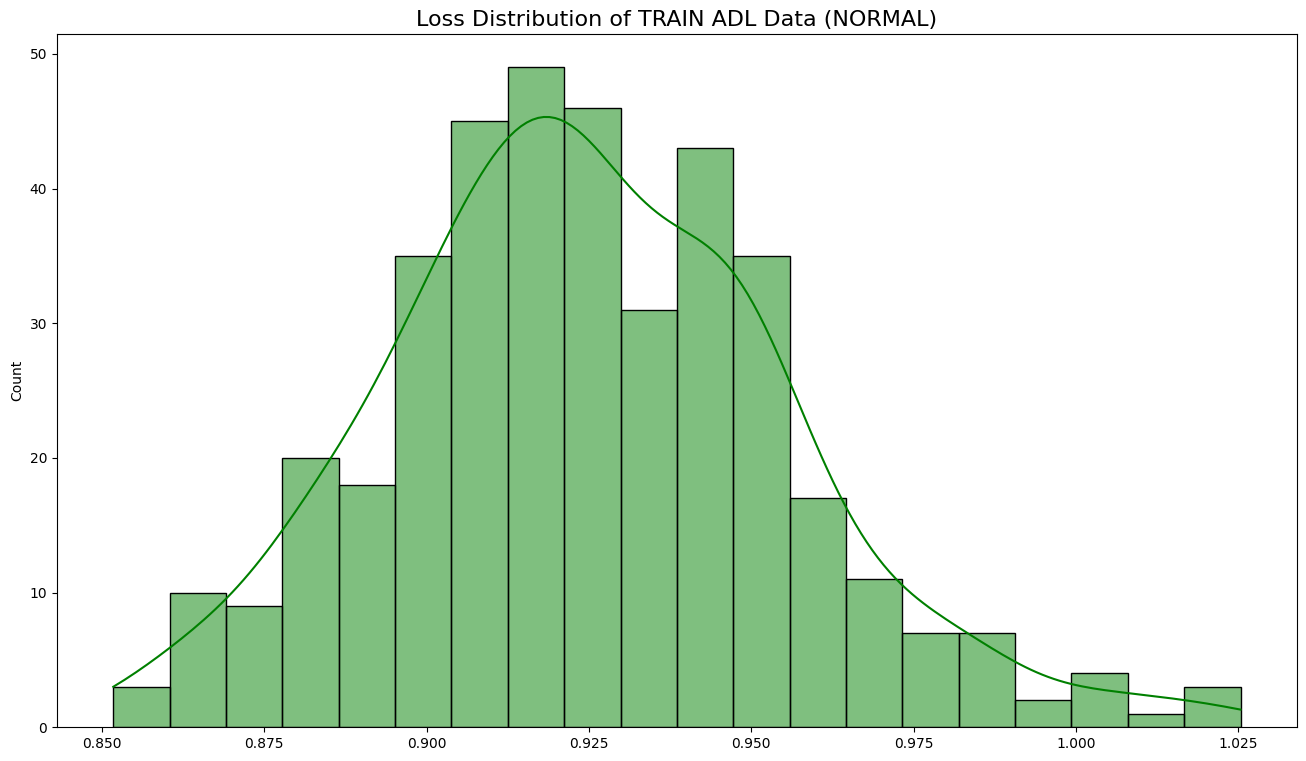

In [24]:
train_dataset = MobiActDataset(train_data)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)

train_anomalies, train_scores, _ = detect_anomalies(model, ddpm, train_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TRAIN ADL Data (NORMAL)', fontsize=16)
sns.histplot(train_scores, bins=20, kde=True, color='green')
plt.show()

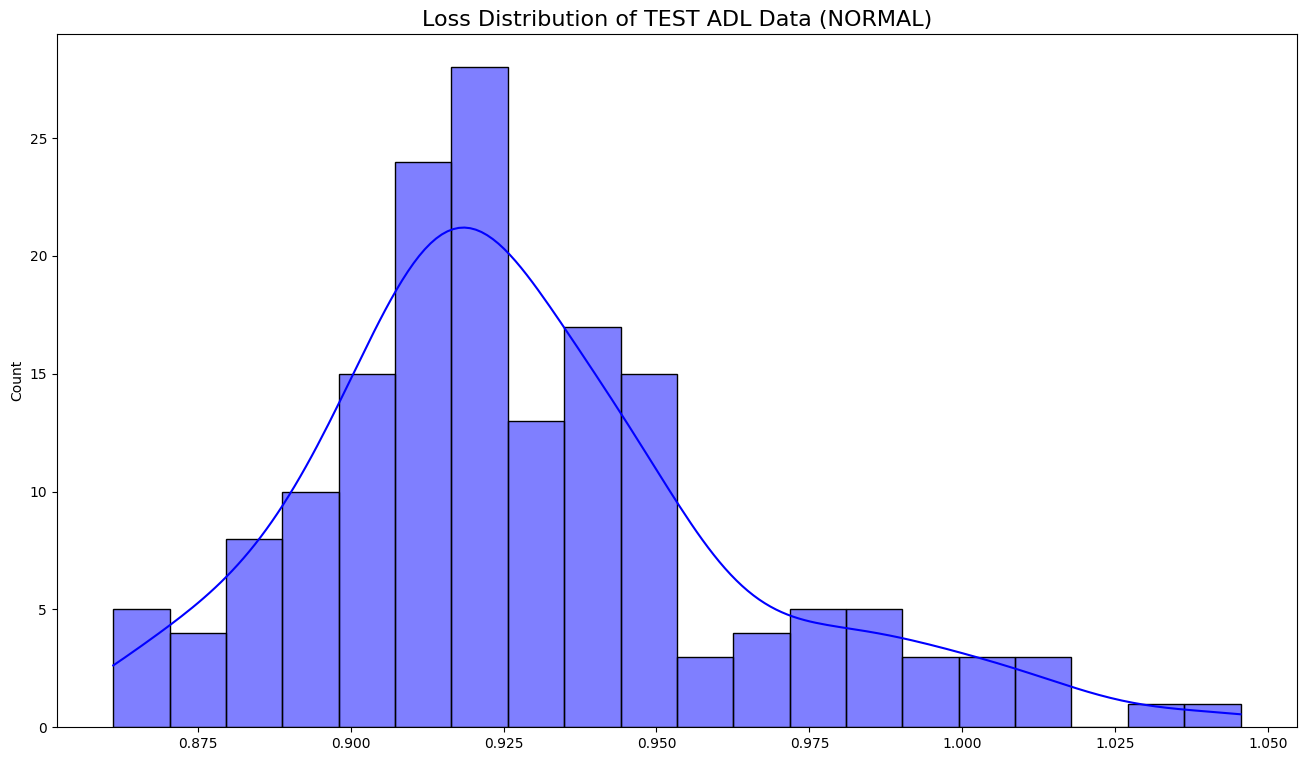

In [25]:
normal_anomalies, normal_scores, _ = detect_anomalies(model, ddpm, normal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST ADL Data (NORMAL)', fontsize=16)
sns.histplot(normal_scores, bins=20, kde=True, color='blue')
plt.show()

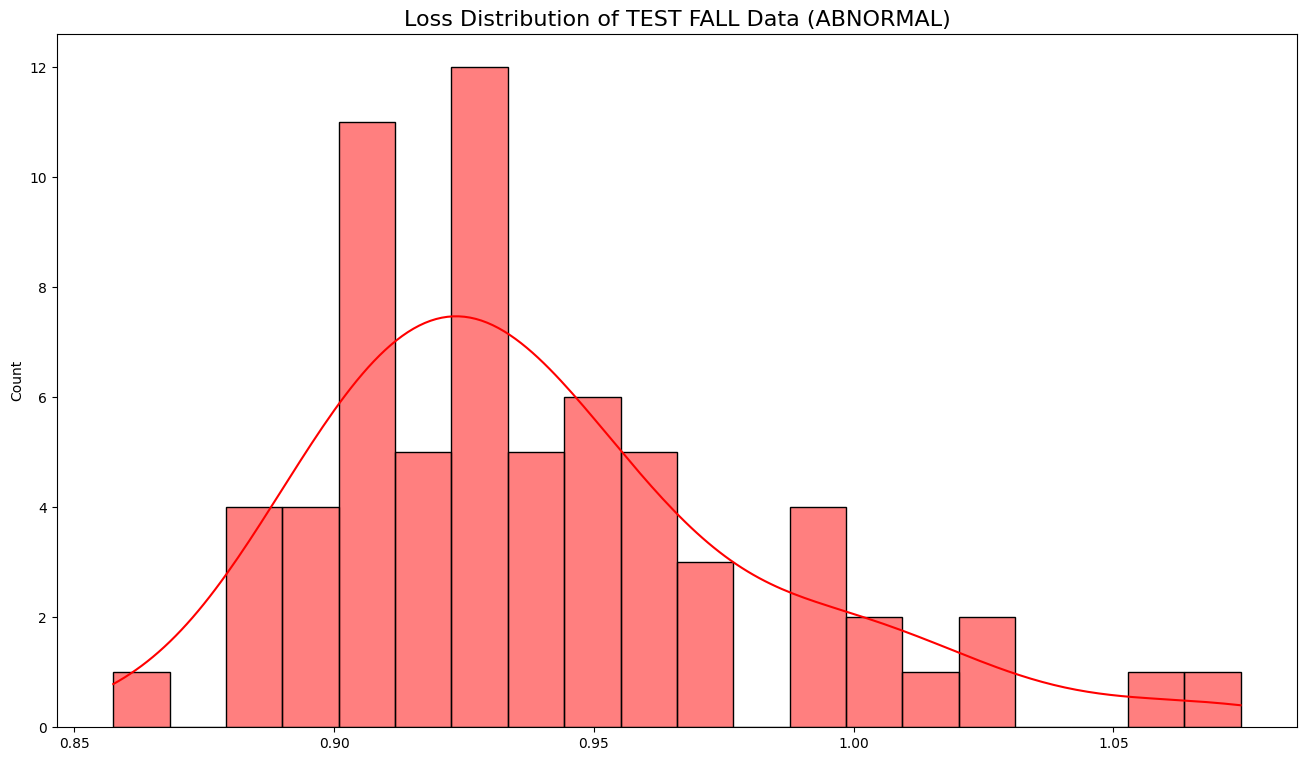

In [26]:
abnormal_anomalies, abnormal_scores, _ = detect_anomalies(model, ddpm, abnormal_loader, device)

plt.figure(figsize=(16,9))
plt.title('Loss Distribution of TEST FALL Data (ABNORMAL)', fontsize=16)
sns.histplot(abnormal_scores, bins=20, kde=True, color='red')
plt.show()

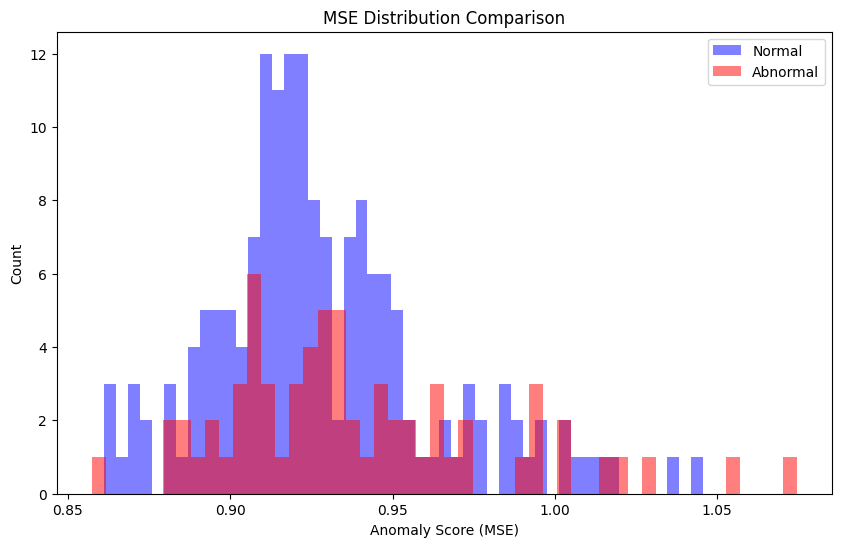

In [27]:
plt.figure(figsize=(10,6))
plt.title('MSE Distribution Comparison')
plt.hist(normal_scores, bins=50, alpha=0.5, color='blue', label='Normal')
plt.hist(abnormal_scores, bins=50, alpha=0.5, color='red', label='Abnormal')
plt.xlabel('Anomaly Score (MSE)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [28]:
error_df = pd.DataFrame({
    'reconstruction_error': np.concatenate([normal_scores, abnormal_scores]),
    'true_class': np.concatenate([np.zeros(len(normal_scores)), np.ones(len(abnormal_scores))])
})

print ("error dataframe head : ")
print(error_df.head(10))
print ()
print ("error dataframe tail : ")
print(error_df.tail(10))
print ()
print(error_df.describe())
print ()
error_df['true_class'].value_counts()

error dataframe head : 
   reconstruction_error  true_class
0              0.891606         0.0
1              0.936226         0.0
2              1.016773         0.0
3              0.947314         0.0
4              0.922938         0.0
5              0.923810         0.0
6              0.927323         0.0
7              0.944900         0.0
8              0.863843         0.0
9              0.861206         0.0

error dataframe tail : 
     reconstruction_error  true_class
224              0.933112         1.0
225              0.923514         1.0
226              0.903617         1.0
227              1.021820         1.0
228              0.971669         1.0
229              0.910805         1.0
230              0.919486         1.0
231              0.879975         1.0
232              0.892704         1.0
233              0.962724         1.0

       reconstruction_error  true_class
count            234.000000  234.000000
mean               0.931484    0.286325
std             

true_class
0.0    167
1.0     67
Name: count, dtype: int64

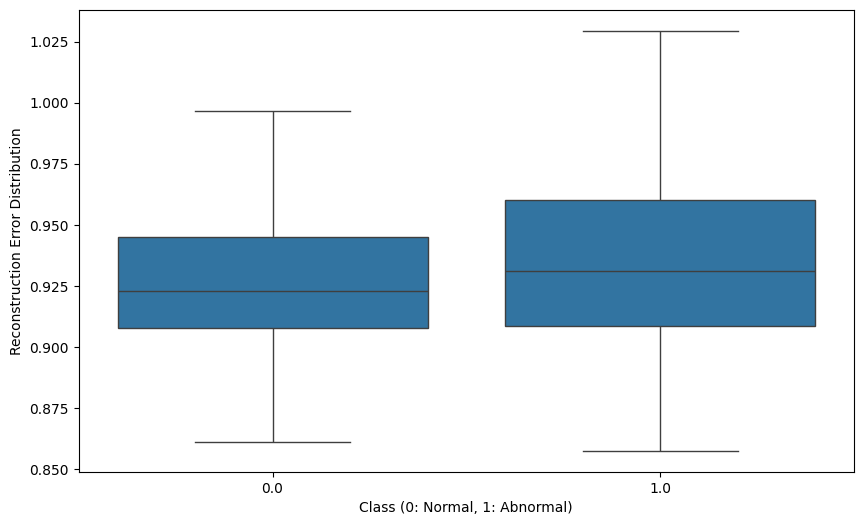

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='true_class', y='reconstruction_error', data=error_df, showfliers=False)
plt.ylabel('Reconstruction Error Distribution')
plt.xlabel('Class (0: Normal, 1: Abnormal)')
plt.show()

In [30]:
threshold = np.percentile(normal_scores, 90)

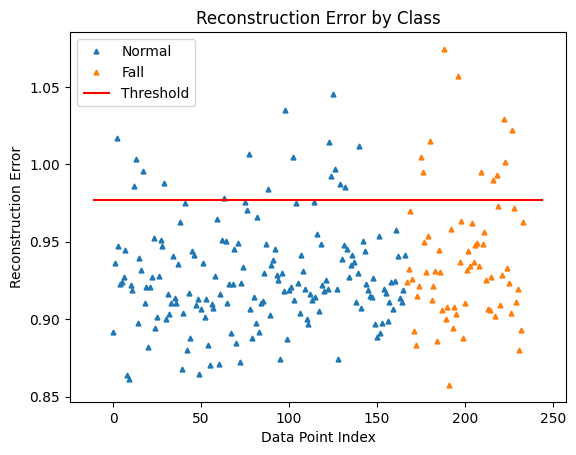

In [31]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label="Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction Error by Class")
plt.ylabel("Reconstruction Error")
plt.xlabel("Data Point Index")
plt.show()

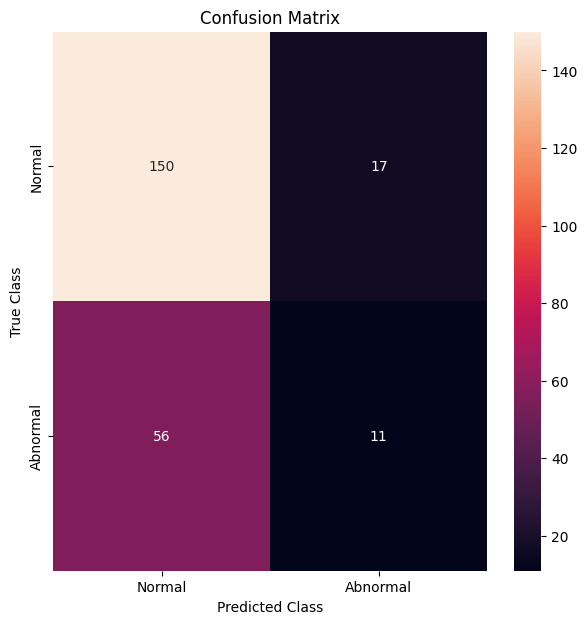

In [32]:
LABELS = ["Normal", "Abnormal"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [33]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(error_df.true_class, y_pred, average='binary')
accuracy = accuracy_score(error_df.true_class, y_pred)

print('\nPerformance Metrics:')
print(f'Accuracy Score : {accuracy:.4f}')
print(f'Precision     : {precision:.4f}')
print(f'Recall        : {recall:.4f}')
print(f'F1 Score      : {f1:.4f}')


Performance Metrics:
Accuracy Score : 0.6880
Precision     : 0.3929
Recall        : 0.1642
F1 Score      : 0.2316
